# Outlier Detection
This code will exemplify the detection of outliers in the data

In [1]:
# Import the necessary libraries
import numpy as np
# We will import the module DistanceMetric to calculate different distances between two points
from sklearn.neighbors import DistanceMetric
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### 1. Outliers have a large influence on the dataset's covariance matrix $S_X$. 
As an example let's create a dataset.

In [2]:
# Generate a set of random values
# Fix the seed of the random generator to get replicable resutls
np.random.seed(0)
# Create 2 arrays of random numbers of size 10, 1
X1 = np.random.randn(10,1)
X2 = np.random.randn(10,1)
# Stack the two random arrays horizontally
X = np.hstack([X1,X2])

### Putting the metrics at work

In [3]:
# for this exercise we will use the euclidean distance
dist = DistanceMetric.get_metric('euclidean')
# Compute the pairwise distance between the random arrays, this will return a matrix of size(X)^2 where the ij value 
# is the distance between the vecor i and the vector j ( the matrix is simetric with ij=0 for all i=j)
dist.pairwise(X)

array([[0.        , 1.8912727 , 0.99869937, 0.47736522, 0.3171833 ,
        2.74788123, 1.5764305 , 1.94698117, 1.87490557, 1.68170134],
       [1.8912727 , 0.        , 0.90295712, 2.27247172, 1.78162678,
        1.77568858, 0.55136995, 1.74868006, 1.24729233, 2.30839286],
       [0.99869937, 0.90295712, 0.        , 1.41485705, 0.94371641,
        2.00215822, 0.73360099, 1.48682542, 1.1710285 , 1.71214444],
       [0.47736522, 2.27247172, 1.41485705, 0.        , 0.49313733,
        3.22514632, 1.88405676, 2.41447344, 2.35191251, 2.07415218],
       [0.3171833 , 1.78162678, 0.94371641, 0.49313733, 0.        ,
        2.84696904, 1.39452635, 2.12067147, 1.97511236, 1.95126329],
       [2.74788123, 1.77568858, 2.00215822, 3.22514632, 2.84696904,
        0.        , 2.24972888, 0.9861468 , 0.8743019 , 1.82674535],
       [1.5764305 , 0.55136995, 0.73360099, 1.88405676, 1.39452635,
        2.24972888, 0.        , 2.02499136, 1.58248035, 2.40935143],
       [1.94698117, 1.74868006, 1.4868254

### 2. In a second step, a "bumped" dataset $Z$ is created

In [4]:
# Copy the data in X to Z and "bump" it 
Z = X.copy()
Z[0,1] = Z[0,1]+3
Z[0,0] = Z[0,0]+2

### 3. For a new point $Y = [3,3]$, we have to consider how close it is to the overal set of observations. The Mahalanobis distance is calculated against both data-sets.

In [5]:
# Create an distance metric corresponding to the mahalanobis distance
# we will pass the covariance matrix to each of the metrics, the ".T" method refers to the transpose of the matrix
dist_X = DistanceMetric.get_metric('mahalanobis', V=np.cov(X.T))
dist_Z = DistanceMetric.get_metric('mahalanobis', V=np.cov(Z.T))

Y = np.array([3,3]).reshape(1,2)
distance_to_X= np.sqrt(sum(dist_X.pairwise(X,Y)**2)[0])
distance_to_Z= np.sqrt(sum(dist_Z.pairwise(Z,Y)**2)[0])
print("The solution is:")
print("Distance to X:", distance_to_X)
print("Distance to Z:", distance_to_Z)

The solution is:
Distance to X: 13.804644778644972
Distance to Z: 7.856397708723


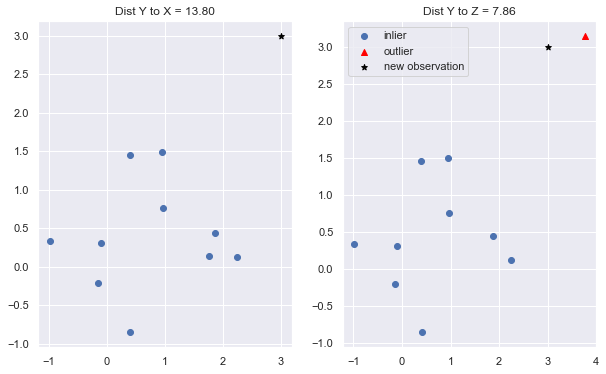

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
# Ploting both datasets and the new point
ax[0].scatter(X[:,0],X[:,1])
ax[0].scatter(Y[0][0], Y[0][1], marker='*', color='black')
ax[0].set_title('Dist Y to X = 13.80')
# Ploting second dataset
ax[1].scatter(Z[1:,0],Z[1:,1])
ax[1].scatter(Z[0,0], Z[0,1], marker='^', color='red')
ax[1].scatter(Y[0][0], Y[0][1], marker='*', color='black')
# Final adjustments for the table
ax[1].set_title('Dist Y to Z = 7.86')
plt.legend(['inlier', 'outlier','new observation']);

### Using Minimum Covariance Determinant

In [7]:
from sklearn.covariance import MinCovDet
robust_Z = MinCovDet().fit(Z)
d_robust = robust_Z.mahalanobis(Y)

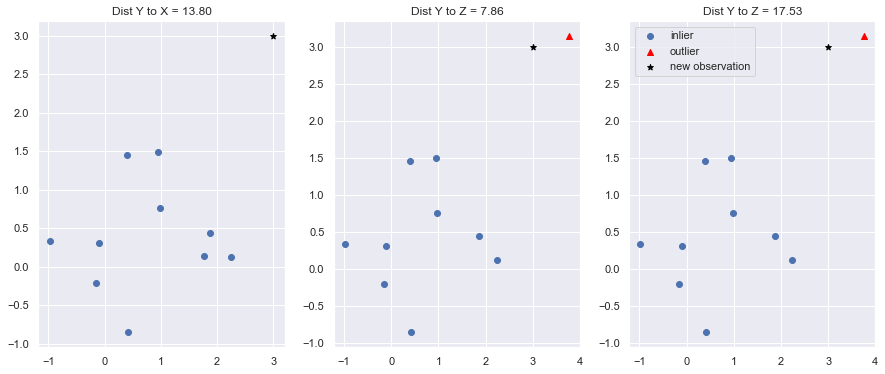

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
# Ploting both datasets and the new point
ax[0].scatter(X[:,0],X[:,1])
ax[0].scatter(Y[0][0], Y[0][1], marker='*', color='black')
ax[0].set_title('Dist Y to X = 13.80')
# Ploting second dataset
ax[1].scatter(Z[1:,0],Z[1:,1])
ax[1].scatter(Z[0,0], Z[0,1], marker='^', color='red')
ax[1].scatter(Y[0][0], Y[0][1], marker='*', color='black')
ax[1].set_title('Dist Y to Z = 7.86')
# Plotting the Z dataset but calculating the distance with robust minimum covariance determinant
ax[2].scatter(Z[1:,0],Z[1:,1])
ax[2].scatter(Z[0,0], Z[0,1], marker='^', color='red')
ax[2].scatter(Y[0][0], Y[0][1], marker='*', color='black')
ax[2].set_title('Dist Y to Z = %.2f' % (d_robust))
# Final adjustments for the table
plt.legend(['inlier', 'outlier','new observation']);